# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import requests

from transformers import TrOCRProcessor , VisionEncoderDecoderModel
from PIL import Image

In [2]:
def load_image(url):
    response = requests.get(url, stream=True)
    response.raise_for_status()
    return Image.open(response.raw).convert('RGB')

def initialize_model(model_name):
    processor = TrOCRProcessor.from_pretrained(model_name)
    model = VisionEncoderDecoderModel.from_pretrained(model_name)
    return processor, model

URL = 'https://fki.tic.heia-fr.ch/static/img/a01-122-02-00.jpg'
MODEL_NAME = 'microsoft/trocr-small-handwritten'

image = load_image(URL)
processor, model = initialize_model(MODEL_NAME)

print("Image uploaded and form configured successfully")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.48, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Config of the encoder: <class 'transformers.models.deit.modeling_deit.DeiTModel'> is overwritten by shared encoder config: DeiTConfig {
  "attention_probs_dro

Image uploaded and form configured successfully


Config of the encoder: <class 'transformers.models.deit.modeling_deit.DeiTModel'> is overwritten by shared encoder config: DeiTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 384,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 1536,
  "layer_norm_eps": 1e-12,
  "model_type": "deit",
  "num_attention_heads": 6,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "qkv_bias": true,
  "torch_dtype": "float32",
  "transformers_version": "4.49.0"
}

Config of the decoder: <class 'transformers.models.trocr.modeling_trocr.TrOCRForCausalLM'> is overwritten by shared decoder config: TrOCRConfig {
  "activation_dropout": 0.0,
  "activation_function": "relu",
  "add_cross_attention": true,
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classifier_dropout": 0.0,
  "cross_attention_hidden_size": 384,
  "d_model": 256,
  "decoder_attention_heads": 8,
  "decod

Model Result:
industry
----------------------------------------------------------------------------------------------------


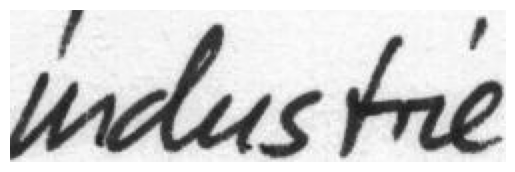

In [3]:
def load_image(url):
    response = requests.get(url, stream=True)
    response.raise_for_status()
    return Image.open(response.raw).convert('RGB')

def initialize_model(model_name):
    processor = TrOCRProcessor.from_pretrained(model_name)
    model = VisionEncoderDecoderModel.from_pretrained(model_name)
    return processor, model

def generate_text_from_image(image, processor, model):
    inputs = processor(images=image, return_tensors='pt').pixel_values
    outputs = model.generate(inputs)
    decoded_text = processor.batch_decode(outputs, skip_special_tokens=True)[0]
    return decoded_text

def display_result(text, image):
    dash_line = '-' * 100
    print(f"Model Result:\n{text}")
    print(dash_line)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

URL = 'https://fki.tic.heia-fr.ch/static/img/a01-122-02-00.jpg'
MODEL_NAME = 'microsoft/trocr-small-handwritten'

image = load_image(URL)
processor, model = initialize_model(MODEL_NAME)
result_text = generate_text_from_image(image, processor, model)
display_result(result_text, image)

In [4]:
import zipfile
import os

zip_path = '/content/archive.zip'
extract_path = '/content/extracted_files'

if os.path.exists(zip_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print(f'Files extracted successfully to: {extract_path}')
else:
    print('The zip file does not exist at the specified path.')

Files extracted successfully to: /content/extracted_files


# Load Data

In [5]:
def load_and_preview_data(file_path, rows=5):
    train_data = pd.read_csv(file_path)
    return train_data.head(rows)

file_path = '/content/extracted_files/written_name_train_v2.csv'
train_data  = load_and_preview_data(file_path)

train_data

,FILENAME,IDENTITY
0,TRAIN_00001.jpg,BALTHAZAR
1,TRAIN_00002.jpg,SIMON
2,TRAIN_00003.jpg,BENES
3,TRAIN_00004.jpg,LA LOVE
4,TRAIN_00005.jpg,DAPHNE


In [6]:
image_file_names = train_data['FILENAME'].tolist()
image_names = train_data['IDENTITY'].tolist()

In [7]:
print(image_names[:5])

['BALTHAZAR', 'SIMON', 'BENES', 'LA LOVE', 'DAPHNE']


Processing Images: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]


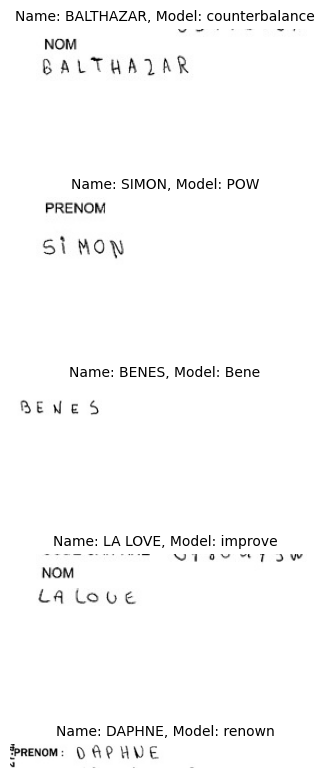

In [8]:
from PIL import Image
from tqdm import tqdm

def process_and_visualize_images(train_path, image_file_names, image_names, processor, model, num_images=5):
    fig, ax = plt.subplots(num_images, 1, figsize=(4, num_images * 2))
    plt.subplots_adjust(hspace=1.5)

    for i in tqdm(range(num_images), desc="Processing Images"):
        image_path = os.path.join(train_path, image_file_names[i])
        image = Image.open(image_path)

        inputs = processor(images=image, return_tensors='pt').pixel_values
        generated = model.generate(inputs, max_new_tokens=1)
        output_text = processor.batch_decode(generated, skip_special_tokens=True)[0]

        actual_name = image_names[i]
        ax[i].imshow(image)
        ax[i].axis('off')
        ax[i].set_title(f'Name: {actual_name}, Model: {output_text}', fontsize=10)

    plt.show()

train_path = '/content/extracted_files/train_v2/train'

process_and_visualize_images(train_path, image_file_names, image_names, processor, model)